<a href="https://colab.research.google.com/github/Dara4hem/Image-Classification-with-Deep-Learning/blob/main/Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow

In [3]:
!pip install tensorflow


Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # For TensorFlow
# import torch  # Uncomment for PyTorch
# import torchvision  # Uncomment for PyTorch
from tensorflow.keras.datasets import cifar10  # For TensorFlow
# from torchvision import datasets, transforms  # Uncomment for PyTorch


Load and Preprocess Data

In [5]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


CNN Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=1)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 50ms/step - accuracy: 0.3528 - loss: 1.7500 - val_accuracy: 0.5396 - val_loss: 1.2671
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.5815 - loss: 1.1825 - val_accuracy: 0.6454 - val_loss: 1.0156
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6472 - loss: 0.9936 - val_accuracy: 0.6856 - val_loss: 0.9072
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6921 - loss: 0.8803 - val_accuracy: 0.6794 - val_loss: 0.8930
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7210 - loss: 0.8047 - val_accuracy: 0.7012 - val_loss: 0.8603
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7381 - loss: 0.7401 - val_accuracy: 0.7162 - val_loss: 0.8374
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.7597 - loss: 0.6772 - val_accuracy: 0.7188 - val_loss: 0.8247
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7729 -

Evaluate the Model

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 5s - 15ms/step - accuracy: 0.6999 - loss: 0.9323

Test accuracy: 0.6998999714851379


Visualize Results

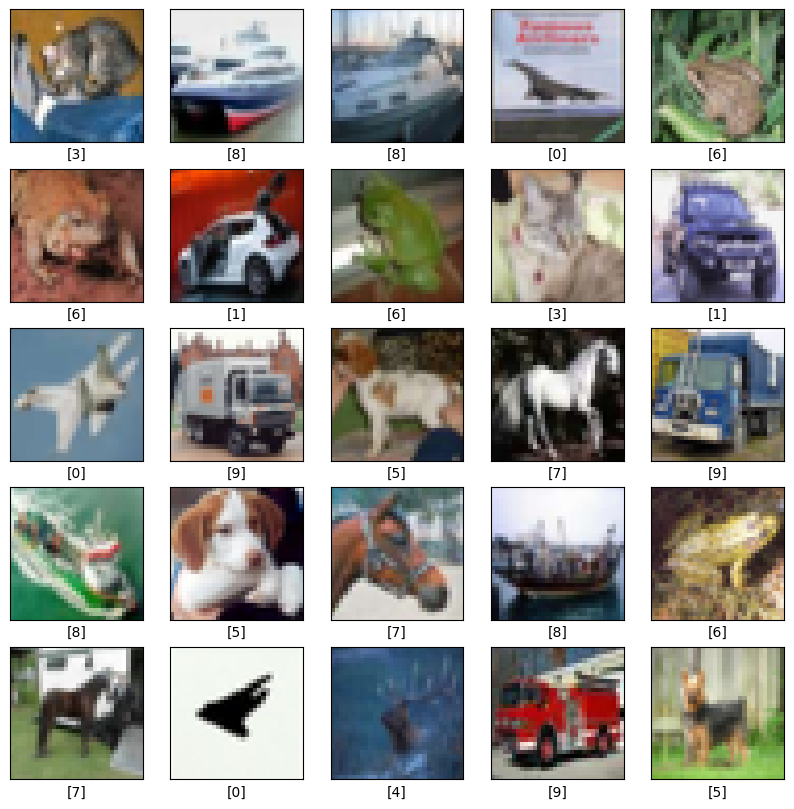

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(y_test[i])
plt.show()


In [10]:
model.save('my_model.h5')
